# Question 1

In [28]:
# imports
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pygal_maps_world.maps import World

In [29]:
# read data
article = pd.read_csv("articleInfo.csv")
author = pd.read_csv("authorInfo.csv")

In [30]:
# merge data
merged = article.merge(author, how="left", on="Article No.") # perform a left merge b/w csv's
merged = merged.fillna(0) # fill the empty cells with 0

# Question 1.1

In [31]:
# aggregation
aggregate_articles = merged.drop_duplicates('Article No.') # get rid of duplicate tuples
aggregate_articles = aggregate_articles.groupby('Year') # for each year
aggregate_articles = aggregate_articles.size().reset_index() # get total number of articles in each year

In [32]:
# split into x and y for plotting
x = aggregate_articles['Year'] # column containing years
y = aggregate_articles[0] # the column containing total # of articles

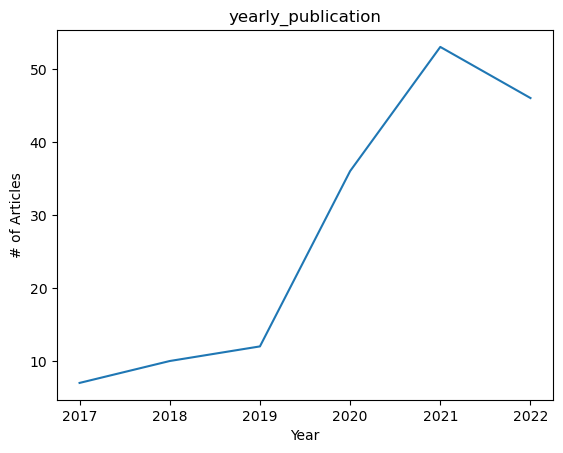

In [33]:
# plot
plt.plot(x,y)
plt.title("yearly_publication")
plt.xlabel("Year")
plt.ylabel("# of Articles")
plt.show()

# Question 1.2

In [34]:
# aggregation
aggregate_citations = merged.drop_duplicates('Article No.') # get rid of duplicate tuples
aggregate_citations = aggregate_citations.groupby('Year')['Citation'] # for each year
aggregate_citations = aggregate_citations.sum().reset_index(); # sum the number of citations in each year

In [35]:
# split into x and y for plotting
x = aggregate_citations['Year'] # year column
y = aggregate_citations['Citation'] # column containing total # of citations in each year

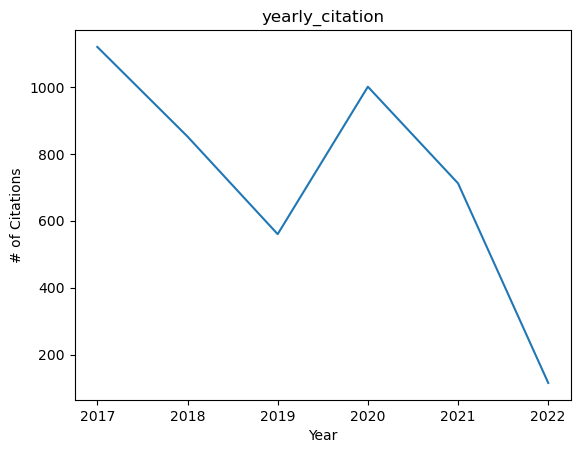

In [36]:
# plot
plt.plot(x,y)
plt.title("yearly_citation")
plt.xlabel("Year")
plt.ylabel("# of Citations")
plt.show()

# Question 1.3

In [37]:
# aggregation
aggregrate_countries = merged.drop_duplicates('Article No.') # remove duplicate tuples
aggregrate_countries = aggregrate_countries.groupby('Country') # for each country
aggregrate_countries = aggregrate_countries.size().reset_index() # get number of articles for each country
aggregrate_countries = aggregrate_countries.tail(-1) # remove top tuple

In [38]:
# combine/format the country name and number of articles in that country in a list object so we can plot it
x = aggregrate_countries[['Country', 0]].values

In [39]:
# plot
worldmap = World()
worldmap.title = 'Countries';
worldmap.add('Publications', x)
worldmap.render_to_file('map.svg') # not able to display in jupyter notebook so output to file

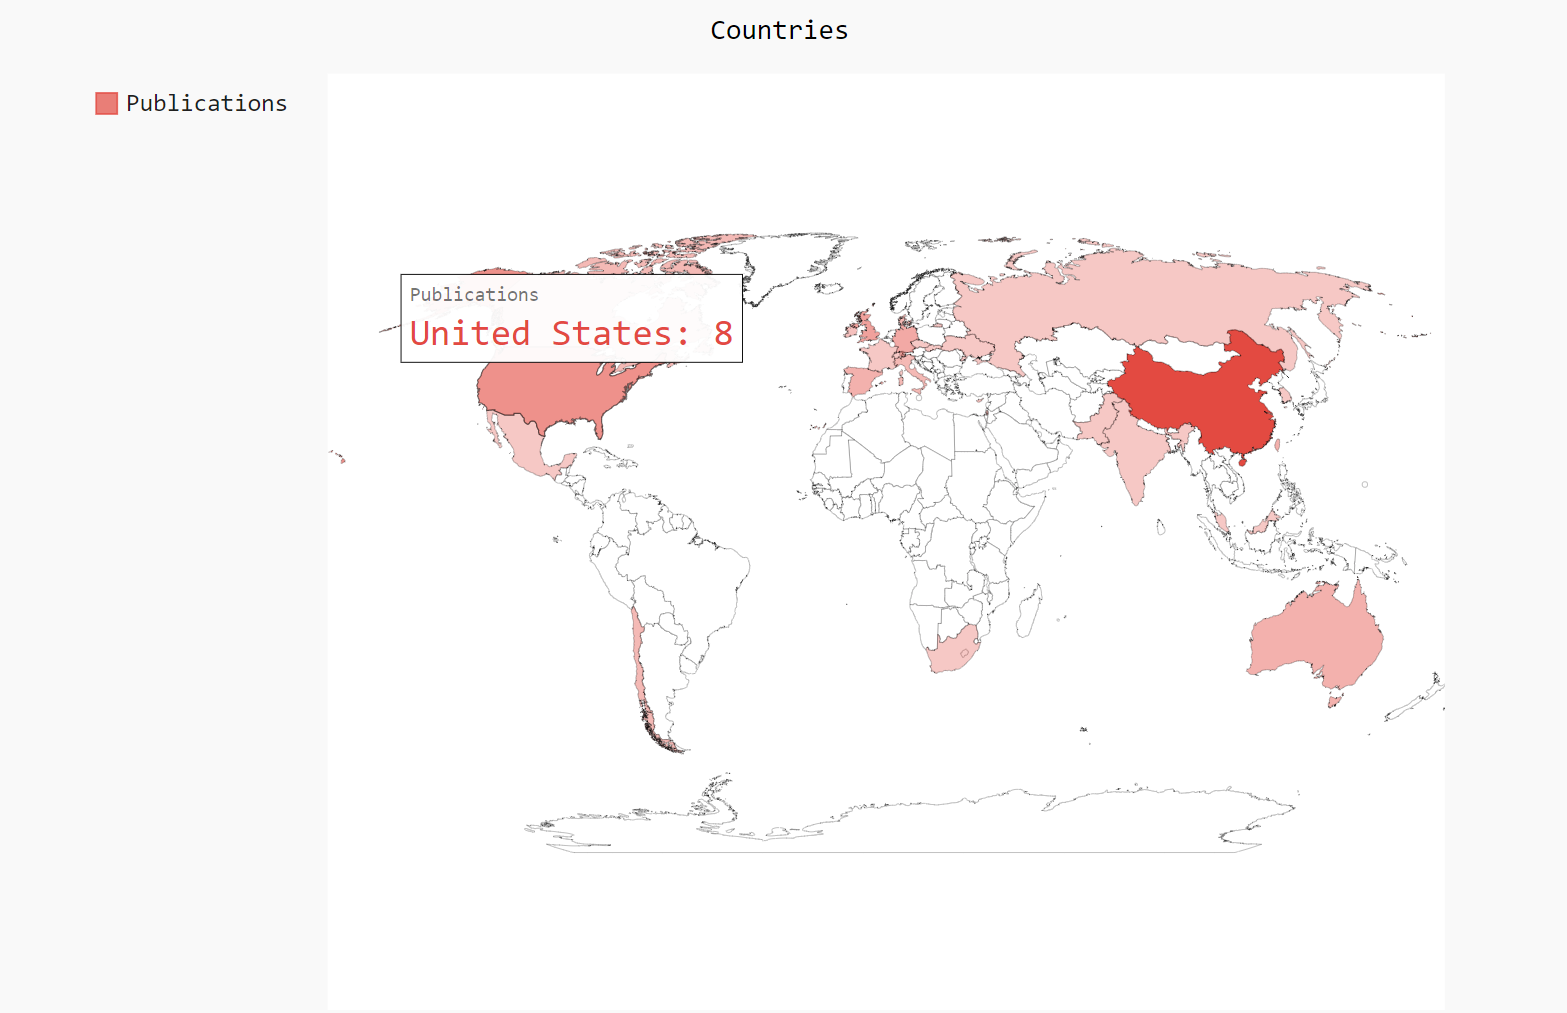
> This is what the svg file looks like (it is uploaded to canvas). Hovering over each country shows the number of articles in each country.

# Question 1.4

In [40]:
question4 = merged.drop_duplicates('Article No.') # drop duplicate tuples
question4 = question4.groupby('Author Affiliation') # group by institution
question4 = question4.size().reset_index() # count number of published articles from each institution
question4 = question4.sort_values(0,ascending=False) # sort descending by number of published articles
question4 = question4.tail(-1) # remove the top institution which is invalid
question4 = question4.head(5) # grab top 5 institutions
print(question4)

                 Author Affiliation  0
57         University of Copenhagen  2
13                 Fudan University  2
9   Cyprus University of Technology  2
50              Universitat Jaume I  1
56          University of Cambridge  1


> The top 5 institutions are: University of Copenhagen, Fudan University, Cyprus University of Technology, Universitat Jaume I, and University of Cambridge.

# Question 1.5

In [41]:
question5 = merged.drop_duplicates('Author Name').reset_index() # drop duplicate tuples
question5 = question5.sort_values('h-index',ascending=False)[['Author Name','h-index']] # sort descending by h-index
question5 = question5.head(5) # grab top 5 (keys author name and h-index)
print(question5)

             Author Name  h-index
117     Ulrich Trautwein     95.0
102     Nicolas Molinari     63.0
130     George S. Athwal     59.0
140  Maria Luisa Lorusso     33.0
147  Vicente A. González     33.0


> The 5 Authors with the Highest H-indexes are Ulrich Trautwein, Nicolas Molinari, George S. Athwal, Maria Luisa Lorusso, and Vicente A. Gonzales.